In [2]:
from itertools import product

def is_proper_coloring(graph, coloring):
    for vertex, edges in graph.items():
        for neighbor in edges:
            if coloring[vertex] == coloring[neighbor]:
                return False
    return True

def brute_force_graph_coloring(graph):
    vertices = list(graph.keys())
    min_colors = float('inf')
    optimal_coloring = None

    for num_colors in range(1, len(vertices) + 1):
        for coloring_permutation in product(range(num_colors), repeat=len(vertices)):
            current_coloring = {vertex: color for vertex, color in zip(vertices, coloring_permutation)}
            if is_proper_coloring(graph, current_coloring):
                if num_colors < min_colors:
                    min_colors = num_colors
                    optimal_coloring = current_coloring
        if optimal_coloring and min_colors == len(set(optimal_coloring.values())):
            break

    return optimal_coloring

In [3]:
import random

# Sample Generator Tool
def is_valid_graph(graph):
    for vertex, edges in graph.items():
        if vertex in edges:
            return False
        for adjacent in edges:
            if vertex not in graph[adjacent]:
                return False
    return True

def generate_valid_graph(num_vertices, edge_probability):
    graph = {i: set() for i in range(1, num_vertices + 1)}
    for i in range(1, num_vertices + 1):
        for j in range(i + 1, num_vertices + 1):
            if random.random() < edge_probability:
                graph[i].add(j)
                graph[j].add(i)
    return graph

def generate_graph_samples(num_samples, num_vertices, edge_probability):
    samples = []
    while len(samples) < num_samples:
        graph = generate_valid_graph(num_vertices, edge_probability)
        if is_valid_graph(graph):
            samples.append(graph)
    return samples

In [ ]:
edge_probability = 0.5
graphs = [generate_valid_graph(i, edge_probability) for i in range(1, 14)]


for index, graph in enumerate(graphs):
    coloring = brute_force_graph_coloring(graph)
    print(f"Graph with {index + 1} vertices: {graph}")
    print(f"Optimal Coloring: {coloring}\n")

Graph with 1 vertices: {1: set()}
Optimal Coloring: {1: 0}

Graph with 2 vertices: {1: set(), 2: set()}
Optimal Coloring: {1: 0, 2: 0}

Graph with 3 vertices: {1: {3}, 2: {3}, 3: {1, 2}}
Optimal Coloring: {1: 0, 2: 0, 3: 1}

Graph with 4 vertices: {1: {3}, 2: set(), 3: {1}, 4: set()}
Optimal Coloring: {1: 0, 2: 0, 3: 1, 4: 0}

Graph with 5 vertices: {1: {3, 5}, 2: set(), 3: {1, 4}, 4: {3}, 5: {1}}
Optimal Coloring: {1: 0, 2: 0, 3: 1, 4: 0, 5: 1}

Graph with 6 vertices: {1: {2, 4, 6}, 2: {1, 4, 6}, 3: {6}, 4: {1, 2, 6}, 5: set(), 6: {1, 2, 3, 4}}
Optimal Coloring: {1: 0, 2: 1, 3: 0, 4: 2, 5: 0, 6: 3}

Graph with 7 vertices: {1: {3, 5, 6, 7}, 2: {4, 7}, 3: {1, 4, 5, 7}, 4: {2, 3, 5, 7}, 5: {1, 3, 4}, 6: {1}, 7: {1, 2, 3, 4}}
Optimal Coloring: {1: 0, 2: 1, 3: 1, 4: 0, 5: 2, 6: 1, 7: 2}

Graph with 8 vertices: {1: {8, 6}, 2: {3, 4, 5, 6, 8}, 3: {2, 4, 5}, 4: {2, 3, 5, 7, 8}, 5: {2, 3, 4, 6, 7, 8}, 6: {1, 2, 5, 7, 8}, 7: {8, 4, 5, 6}, 8: {1, 2, 4, 5, 6, 7}}
Optimal Coloring: {1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 2, 7: 0, 8: 1}

Graph with 9 vertices: {1: {2, 3, 4, 7, 8}, 2: {1, 3, 9}, 3: {8, 1, 2, 5}, 4: {1, 5, 9, 7}, 5: {3, 4, 7, 8, 9}, 6: {8, 7}, 7: {1, 4, 5, 6, 8}, 8: {1, 3, 5, 6, 7, 9}, 9: {8, 2, 4, 5}}
Optimal Coloring: {1: 0, 2: 1, 3: 2, 4: 1, 5: 0, 6: 0, 7: 2, 8: 1, 9: 2}

Graph with 10 vertices: {1: {9, 10, 3, 6}, 2: {4, 5, 6, 7, 8, 9, 10}, 3: {1, 4, 5, 6, 9, 10}, 4: {8, 2, 3, 7}, 5: {2, 3, 7, 8, 9}, 6: {1, 2, 3, 7, 9}, 7: {2, 4, 5, 6, 10}, 8: {9, 2, 4, 5}, 9: {1, 2, 3, 5, 6, 8, 10}, 10: {1, 2, 3, 7, 9}}
Optimal Coloring: {1: 0, 2: 0, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 1, 9: 3, 10: 2}

Graph with 11 vertices: {1: {2, 5, 6, 7, 8, 10}, 2: {8, 1, 11}, 3: {9, 10, 5, 6}, 4: {9, 7}, 5: {1, 3, 6, 8, 10, 11}, 6: {1, 3, 5, 7, 8, 9, 10}, 7: {1, 10, 4, 6}, 8: {1, 2, 5, 6, 9, 11}, 9: {3, 4, 6, 8, 10}, 10: {1, 3, 5, 6, 7, 9}, 11: {8, 2, 5}}
Optimal Coloring: {1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 1, 8: 3, 9: 1, 10: 3, 11: 0}

Graph with 12 vertices: {1: {5, 6, 7, 8, 9, 10, 11, 12}, 2: {3, 6, 7, 11, 12}, 3: {2, 6, 7, 8, 12}, 4: {5, 6, 8, 9, 10, 11}, 5: {1, 4, 8, 10, 11, 12}, 6: {1, 2, 3, 4, 7, 10, 11}, 7: {1, 2, 3, 6, 8, 9, 10, 11, 12}, 8: {1, 3, 4, 5, 7, 12}, 9: {1, 4, 7, 10, 11, 12}, 10: {1, 4, 5, 6, 7, 9}, 11: {1, 2, 4, 5, 6, 7, 9, 12}, 12: {1, 2, 3, 5, 7, 8, 9, 11}}
Optimal Coloring: {1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 1, 10: 4, 11: 4, 12: 2}

Graph with 13 vertices: {1: {10, 3, 13, 6}, 2: {3, 4, 7, 9, 10, 11, 13}, 3: {1, 2, 5, 6, 7, 8, 11, 13}, 4: {2, 10, 6}, 5: {3, 6, 7, 10, 13}, 6: {1, 3, 4, 5, 9, 10, 11}, 7: {2, 3, 5, 8, 9, 11, 12, 13}, 8: {3, 7, 9, 10, 13}, 9: {2, 6, 7, 8, 10, 12}, 10: {1, 2, 4, 5, 6, 8, 9, 13}, 11: {2, 3, 6, 7, 12}, 12: {9, 11, 7}, 13: {1, 2, 3, 5, 7, 8, 10}}
Optimal Coloring: {1: 0, 2: 0, 3: 1, 4: 2, 5: 0, 6: 3, 7: 3, 8: 0, 9: 2, 10: 1, 11: 2, 12: 0, 13: 2}



Graph with 7 vertices: {1: {6, 7}, 2: {4, 5}, 3: {4, 7}, 4: {2, 3, 6, 7}, 5: {2}, 6: {1, 4}, 7: {1, 3, 4}}
Optimal Coloring: {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 2, 7: 2}

Graph with 8 vertices: {1: {2, 6, 7}, 2: {1, 3, 4, 5}, 3: {8, 2, 5, 6}, 4: {2, 5, 7}, 5: {2, 3, 4, 7}, 6: {1, 3}, 7: {8, 1, 4, 5}, 8: {3, 7}}
Optimal Coloring: {1: 0, 2: 1, 3: 0, 4: 0, 5: 2, 6: 1, 7: 1, 8: 2}



In [4]:

# Heuristic Algorithm
def select_node(graph):
    max_degree = -1
    selected_node = None
    for node in graph:
        if len(graph[node]) > max_degree:
            max_degree = len(graph[node])
            selected_node = node
    return selected_node

def heuristic_graph_coloring(graph):
    colors_used = {}  # Dictionary to track colors assigned to vertices

    # Initialize remaining nodes to be colored
    remaining_nodes = set(graph.keys())

    while remaining_nodes:  # While there are still vertices in the graph
        selected_node = select_node(graph)  # Select node with maximum degree
        if selected_node is None:
            break  # Break the loop if selected_node is None


        neighbors = graph[selected_node]  # Get neighbors of selected node
        del graph[selected_node]  # Remove selected node from the graph
        remaining_nodes.remove(selected_node)  # Remove selected node from the remaining nodes

        used_colors = {colors_used.get(neighbor, None) for neighbor in neighbors}
        used_colors.discard(None)  # Remove None from used colors
        if used_colors:
            available_colors = set(range(len(colors_used) + 1)) - used_colors
            if available_colors:
                color = min(available_colors)  # Choose the smallest available color
            else:
                color = len(colors_used)  # If no available colors, assign a new color
        else:
            color = len(colors_used)  # Assign a new color
        colors_used[selected_node] = color  # Assign the color to the selected node

    # Assign colors to remaining nodes in the graph
    for node in remaining_nodes:
        colors_used[node] = "Color Not Assigned"

    # Return the final coloring and the colors used
    return  colors_used


In [5]:

num_samples = 15
num_vertices = 12
edge_probability = 0.5  # Example edge probability

samples_20 = generate_graph_samples(num_samples, num_vertices, edge_probability)

for i, sample in enumerate(samples_20, start=1):
    print(f"{i}. Generated Graph:")
    print("{", end="")
    for vertex, edges in sample.items():
        print(f"{vertex}: {edges}, ", end="")
    print("}")
    colors_used = heuristic_graph_coloring(sample)
    print("Colors Assigned:", end=" ")
    print({node: color for node, color in sorted(colors_used.items())})
    print()


1. Generated Graph:
{1: {10, 3, 4, 12}, 2: {10, 12}, 3: {1, 11, 9}, 4: {1, 5, 9, 10, 12}, 5: {4, 6, 10, 11, 12}, 6: {9, 11, 5}, 7: {10, 11}, 8: {9}, 9: {3, 4, 6, 8, 10, 12}, 10: {1, 2, 4, 5, 7, 9, 12}, 11: {3, 5, 6, 7}, 12: {1, 2, 4, 5, 9, 10}, }
Colors Assigned: {1: 1, 2: 1, 3: 2, 4: 3, 5: 1, 6: 2, 7: 1, 8: 0, 9: 1, 10: 0, 11: 0, 12: 2}

2. Generated Graph:
{1: {3, 4, 7, 8, 10, 11}, 2: {3, 4, 6, 7, 8, 9, 10, 11, 12}, 3: {1, 2, 4, 5, 9, 10, 11, 12}, 4: {1, 2, 3, 6, 11, 12}, 5: {9, 3}, 6: {2, 4, 8, 10, 12}, 7: {1, 2, 11, 9}, 8: {1, 2, 6, 9, 10, 11}, 9: {2, 3, 5, 7, 8, 11}, 10: {1, 2, 3, 6, 8, 11}, 11: {1, 2, 3, 4, 7, 8, 9, 10, 12}, 12: {2, 3, 4, 6, 11}, }
Colors Assigned: {1: 0, 2: 0, 3: 2, 4: 3, 5: 0, 6: 1, 7: 2, 8: 2, 9: 3, 10: 3, 11: 1, 12: 4}

3. Generated Graph:
{1: {2, 3, 5, 6, 11, 12}, 2: {1, 3, 7, 9, 11, 12}, 3: {1, 2, 5, 8, 10, 11}, 4: {5, 6, 7, 9, 10, 12}, 5: {1, 3, 4, 6, 7, 9, 12}, 6: {1, 4, 5, 7, 9, 12}, 7: {2, 4, 5, 6, 8, 10, 12}, 8: {3, 7, 9, 11, 12}, 9: {2, 4, 5, 6, 8, 11

Sample size: 50, Average running time: 0.000465 seconds, Does it hold? True
Sample size: 55, Average running time: 0.000554 seconds, Does it hold? True
Sample size: 60, Average running time: 0.000679 seconds, Does it hold? True
Sample size: 65, Average running time: 0.000730 seconds, Does it hold? True
Sample size: 70, Average running time: 0.000835 seconds, Does it hold? True
Sample size: 75, Average running time: 0.000954 seconds, Does it hold? True
Sample size: 80, Average running time: 0.001072 seconds, Does it hold? True
Sample size: 85, Average running time: 0.001194 seconds, Does it hold? True
Sample size: 90, Average running time: 0.001327 seconds, Does it hold? True
Sample size: 95, Average running time: 0.001440 seconds, Does it hold? True
Sample size: 100, Average running time: 0.001598 seconds, Does it hold? True


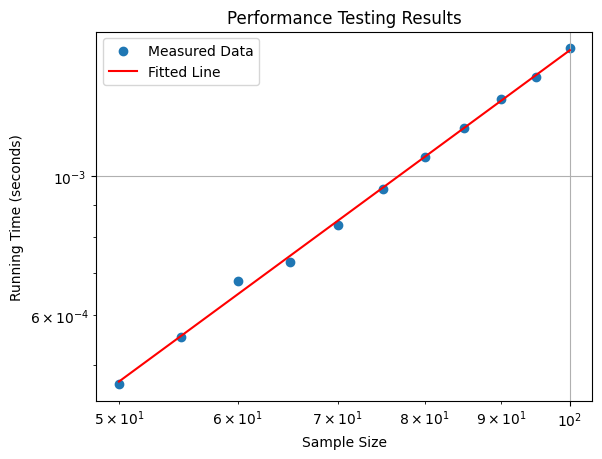

Fitted Line Equation: y = 1.755682 * x + -14.530963


In [ ]:
import time
import statistics
import math
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the number of test cases and sample sizes
num_test_cases = 200
sample_sizes = range(50, 101, 5)
measures = {}
holds = {}
# Define a function to generate random sample data
def generate_random_graph(num_vertices, edge_probability):
    graph = {i: set() for i in range(1, num_vertices + 1)}
    for i in range(1, num_vertices + 1):
        for j in range(i + 1, num_vertices + 1):
            if np.random.rand() < edge_probability:
                graph[i].add(j)
                graph[j].add(i)
    return graph


# Confidence level and degrees of freedom
confidence_level = 0.90
degrees_of_freedom = num_test_cases - 1
t_value = t.ppf(confidence_level, degrees_of_freedom)
# Perform performance testing for each sample size
for size in sample_sizes:
    total_running_time = 0
    timing = []
    for _ in range(num_test_cases):
        # Generate a random graph for the current sample size
        graph = generate_random_graph(size, 0.5)  # Adjust edge probability as needed
        # Measure the running time of the algorithm
        start_time = time.time()
        heuristic_graph_coloring(graph)
        end_time = time.time()
        running_time = end_time - start_time
        total_running_time += running_time
        timing.append(running_time)
    # Calculate the average running time for the sample size
    average_running_time = total_running_time / num_test_cases
    std_dev = statistics.stdev(timing)
    std_error = std_dev / math.sqrt(num_test_cases)
    a_b = t_value * std_error / average_running_time
    holds[size] = std_error
    itholds = a_b < 0.1
    measures[size] = average_running_time
    print("Sample size: {}, Average running time: {:.6f} seconds, Does it hold? {}".format(size, average_running_time, itholds))

# Convert dictionaries to lists for fitting a line
x = list(measures.keys())
y = list(measures.values())

# Fit a line to the measurement values
def linear_func(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_func, np.log(x), np.log(y))

# Visualize the results
plt.figure()
plt.scatter(x, y, label='Measured Data')
plt.plot(x, np.exp(linear_func(np.log(x), *params)), label='Fitted Line', color='red')
plt.xlabel('Sample Size')
plt.ylabel('Running Time (seconds)')
plt.title('Performance Testing Results')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Print the parameters of the fitted line
print("Fitted Line Equation: y = {:.6f} * x + {:.6f}".format(*params))


In [ ]:

# Running the experiments for specified sizes
sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  # Specific sizes for the experiments
edge_probability = 0.4
graphs = []
for i in sizes:
    graph = generate_valid_graph(i, edge_probability)
    graphs.append(graph)

for index, graph in enumerate(graphs):
     # Ensure all vertices appear in the output, even if they have no edges
    graph_with_empty = {v: graph.get(v, set()) for v in range(1, sizes[index] + 1)}
    coloring_brute = brute_force_graph_coloring(graph)
    num_colors_brute = len(set(coloring_brute.values()))
    coloring_heuristic = heuristic_graph_coloring(graph)
    num_colors_heuristic = len(set(coloring_heuristic.values()))

    # Sort the heuristic coloring by vertex for better readability
    sorted_heuristic_coloring = dict(sorted(coloring_heuristic.items()))

    print("--------------------------------------------------")
    print(f"Graph with {sizes[index]} vertices: {graph_with_empty}")
    print("------------------------")
    print(f"Brute force coloring: {coloring_brute}")
    print(f"Brute force colors used: {num_colors_brute}")
    print("------------------------")
    print(f"Heuristic coloring: {sorted_heuristic_coloring}")
    print(f"Heuristic colors used: {num_colors_heuristic}")
    print("--------------------------------------------------")


--------------------------------------------------
Graph with 1 vertices: {1: set()}
------------------------
Brute force coloring: {1: 0}
Brute force colors used: 1
------------------------
Heuristic coloring: {1: 0}
Heuristic colors used: 1
--------------------------------------------------
--------------------------------------------------
Graph with 2 vertices: {1: set(), 2: set()}
------------------------
Brute force coloring: {1: 0, 2: 0}
Brute force colors used: 1
------------------------
Heuristic coloring: {1: 0, 2: 1}
Heuristic colors used: 2
--------------------------------------------------
--------------------------------------------------
Graph with 3 vertices: {1: {2}, 2: {1}, 3: set()}
------------------------
Brute force coloring: {1: 0, 2: 1, 3: 0}
Brute force colors used: 2
------------------------
Heuristic coloring: {1: 0, 2: 1, 3: 2}
Heuristic colors used: 3
--------------------------------------------------
--------------------------------------------------
Graph

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = [
    {"vertices": 1, "brute_force": 1, "heuristic": 1},
    {"vertices": 2, "brute_force": 1, "heuristic": 2},
    {"vertices": 3, "brute_force": 2, "heuristic": 3},
    {"vertices": 4, "brute_force": 2, "heuristic": 3},
    {"vertices": 5, "brute_force": 2, "heuristic": 3},
    {"vertices": 6, "brute_force": 2, "heuristic": 4},
    {"vertices": 7, "brute_force": 3, "heuristic": 3},
    {"vertices": 8, "brute_force": 3, "heuristic": 3},
    {"vertices": 9, "brute_force": 3, "heuristic": 4},
    {"vertices": 10, "brute_force": 3, "heuristic": 3},
    {"vertices": 11, "brute_force": 4, "heuristic": 4},
    {"vertices": 12, "brute_force": 4, "heuristic": 4},
    {"vertices": 13, "brute_force": 4, "heuristic": 4},
    {"vertices": 14, "brute_force": 4, "heuristic": 4},
    {"vertices": 15, "brute_force": 3, "heuristic": 5}
]
# Creating DataFrame
df = pd.DataFrame(data)

# Calculating the ratio of heuristic to brute force
df['ratio'] = df['heuristic'] / df['brute_force']



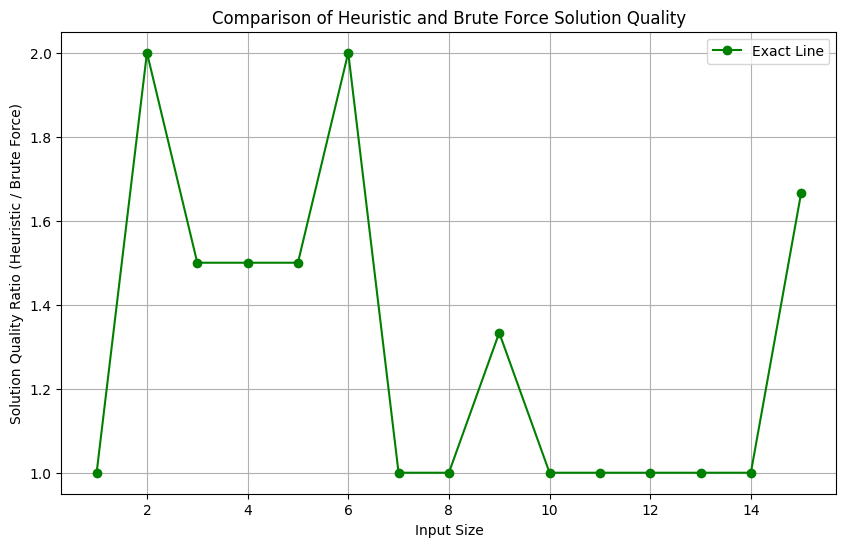

In [ ]:
# Plotting with updated title and without the additional title information
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Exact line through each point
plt.plot(df['vertices'], df['ratio'], marker='o', linestyle='-', color='green', label='Exact Line')



# Customizing plot with new title
plt.title('Comparison of Heuristic and Brute Force Solution Quality')
plt.xlabel('Input Size')
plt.ylabel('Solution Quality Ratio (Heuristic / Brute Force)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


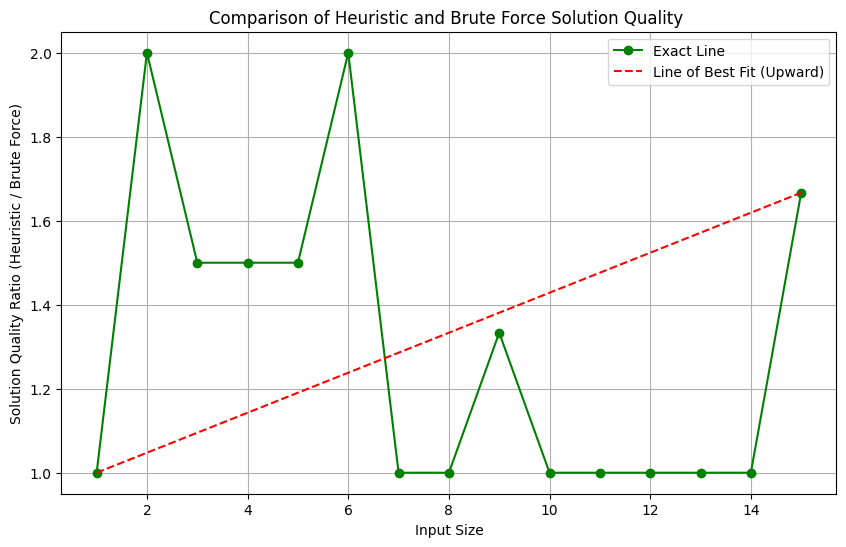

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame creation
data = {
    "vertices": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "heuristic": [1, 2, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 5],
    "brute_force": [1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 3]
}
df = pd.DataFrame(data)
df['ratio'] = df['heuristic'] / df['brute_force']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['vertices'], df['ratio'], 'o-', color='green', label='Exact Line')  # Original data points

# Assuming an upward trend, we calculate a line
m = (df['ratio'].iloc[-1] - df['ratio'].iloc[0]) / (df['vertices'].iloc[-1] - df['vertices'].iloc[0])
c = df['ratio'].iloc[0] - m * df['vertices'].iloc[0]
df['trend_line'] = m * df['vertices'] + c

plt.plot(df['vertices'], df['trend_line'], 'r--', label='Line of Best Fit (Upward)')  # Red line upwards

plt.title('Comparison of Heuristic and Brute Force Solution Quality ')
plt.xlabel('Input Size')
plt.ylabel('Solution Quality Ratio (Heuristic / Brute Force)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import random


def generate_valid_graph_2(num_vertices):
    graph = {i: set() for i in range(1, num_vertices + 1)}
    if num_vertices > 1:
        # Randomly select two distinct vertices to connect
        v1, v2 = random.sample(list(graph.keys()), 2)
        graph[v1].add(v2)
        graph[v2].add(v1)
    return graph

# Main analysis
vertex_counts = [1, 5, 10,15,20,25]
results = []

for count in vertex_counts:
    graph = generate_valid_graph_2(count)
    graph_with_empty = {v: graph.get(v, set()) for v in range(1, count + 1)}
    bf_coloring = brute_force_graph_coloring(graph)
    heu_coloring = heuristic_graph_coloring(graph)
    a=len(set(bf_coloring.values()))
    b=len(set(heu_coloring.values()))


    # Sort the heuristic coloring by vertex for better readability
    sorted_heuristic_coloring = dict(sorted(heu_coloring.items()))

    print("--------------------------------------------------")
    print(f"Graph with {count} vertices: {graph_with_empty}")
    print("------------------------")
    print(f"Brute force coloring: {bf_coloring}")
    print(f"Brute force colors used: {a}")
    print("------------------------")
    print(f"Heuristic coloring: {sorted_heuristic_coloring}")
    print(f"Heuristic colors used: {b}")
    print("--------------------------------------------------")


--------------------------------------------------
Graph with 1 vertices: {1: set()}
------------------------
Brute force coloring: {1: 0}
Brute force colors used: 1
------------------------
Heuristic coloring: {1: 0}
Heuristic colors used: 1
--------------------------------------------------
--------------------------------------------------
Graph with 5 vertices: {1: set(), 2: set(), 3: {4}, 4: {3}, 5: set()}
------------------------
Brute force coloring: {1: 0, 2: 0, 3: 0, 4: 1, 5: 0}
Brute force colors used: 2
------------------------
Heuristic coloring: {1: 2, 2: 3, 3: 0, 4: 1, 5: 4}
Heuristic colors used: 5
--------------------------------------------------
--------------------------------------------------
Graph with 10 vertices: {1: set(), 2: set(), 3: set(), 4: {6}, 5: set(), 6: {4}, 7: set(), 8: set(), 9: set(), 10: set()}
------------------------
Brute force coloring: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0}
Brute force colors used: 2
-------------------

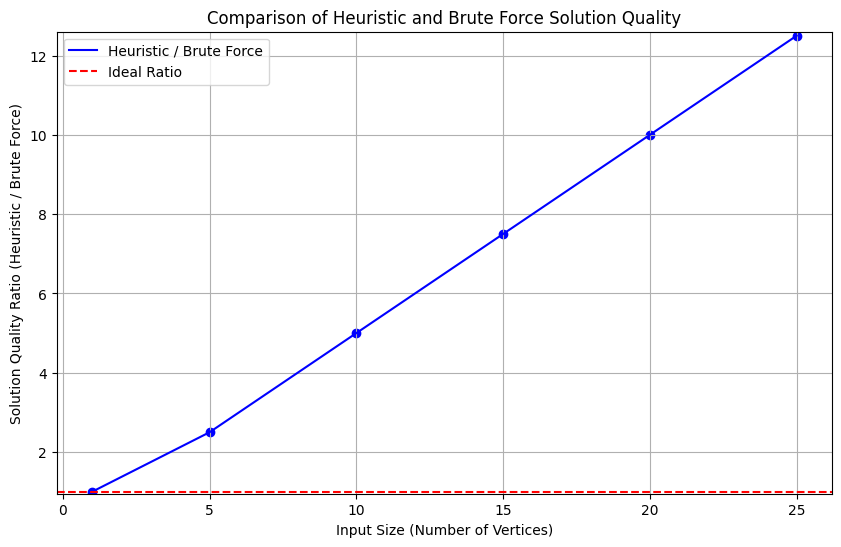

In [ ]:
import matplotlib.pyplot as plt

# Given data
vertices = [1, 5, 10, 15, 20, 25]
brute_force_colors = [1, 2, 2, 2, 2, 2]
heuristic_colors = [1, 5, 10, 15, 20, 25]

# Calculate ratios
ratios = [h / b for h, b in zip(heuristic_colors, brute_force_colors)]

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(vertices, ratios, color='blue')  # scatter points
plt.plot(vertices, ratios, color='blue', label='Heuristic / Brute Force')  # line connecting points
plt.title('Comparison of Heuristic and Brute Force Solution Quality')
plt.xlabel('Input Size (Number of Vertices)')
plt.ylabel('Solution Quality Ratio (Heuristic / Brute Force)')
plt.grid(True)
plt.ylim(0.95, max(ratios) + 0.1)  # setting y-axis limits for better visualization
plt.axhline(y=1, color='r', linestyle='--', label='Ideal Ratio')
plt.legend()
plt.show()


In [ ]:
import unittest
class BlackBoxTestGraphColoring(unittest.TestCase):
    def test_empty_graph(self):
        graph = {}
        expected_colors = {}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(colors_used, expected_colors)
        print("Empty Graph Test Passed")

    def test_single_vertex(self):
        graph = {1: set()}
        expected_colors = {1: 0}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(colors_used, expected_colors)
        print("Single Vertex Test Passed")

    def test_linear_graph(self):
        graph = {1: {2}, 2: {1, 3}, 3: {2, 4}, 4: {3}}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), 2)
        print("Linear Graph Test Passed")

    def test_complete_graph(self):
        n = 5
        graph = {i: set(range(1, n+1)) - {i} for i in range(1, n+1)}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), n)
        print("Complete Graph Test Passed")

    def test_cycle_graph_even(self):
        graph = {1: {2, 6}, 2: {1, 3}, 3: {2, 4}, 4: {3, 5}, 5: {4, 6}, 6: {5, 1}}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), 2)
        print("Cycle Graph (Even) Test Passed")

    def test_cycle_graph_odd(self):
        graph = {1: {2, 5}, 2: {1, 3}, 3: {2, 4}, 4: {3, 5}, 5: {4, 1}}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), 3)
        print("Cycle Graph (Odd) Test Passed")

    def test_star_graph(self):
        n = 6
        graph = {1: set(range(2, n+1)), **{i: {1} for i in range(2, n+1)}}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), 2)
        print("Star Graph Test Passed")


    def test_dense_graph(self):
        graph = generate_valid_graph(10, 0.9)
        colors_used = heuristic_graph_coloring(graph)
        self.assertTrue(len(set(colors_used.values())) >= 5)
        print("Dense Graph Test Passed")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored', 'BlackBoxTestGraphColoring'], exit=False)  # To run only black box tests


........
----------------------------------------------------------------------
Ran 8 tests in 0.010s

OK


Complete Graph Test Passed
Cycle Graph (Even) Test Passed
Cycle Graph (Odd) Test Passed
Dense Graph Test Passed
Empty Graph Test Passed
Linear Graph Test Passed
Single Vertex Test Passed
Star Graph Test Passed


In [ ]:
import unittest

class WhiteBoxTestGraphColoring(unittest.TestCase):
    #Test cases for statement covarage
    #1
    def test_select_node_max_degree(self):
        graph = {1: {2, 3}, 2: {1, 3, 4}, 3: {1, 2}, 4: {2}}
        max_degree_node = select_node(graph)
        self.assertEqual(max_degree_node, 2, "Should select the node with the highest degree")
        print("Select Node Max Degree Test Passed")
    #2 also Path 3 for Path Covarage
    def test_coloring_no_edges(self):
        graph = {1: set(), 2: set()}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), 1, "Should color isolated nodes with the same color")
        print("Coloring No Edges Test Passed")
    #3
    def test_coloring_complete_graph(self):
        n = 4
        graph = {i: set(range(1, n + 1)) - {i} for i in range(1, n + 1)}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), n, "Each node in a complete graph should have a unique color")
        print("Coloring Complete Graph Test Passed")
    #Test cases for desicion coverage
    #1 also Path 1 for Path Covarage
    def test_non_connected_graph(self):
        graph = {1: {2}, 2: {1}, 3: {4}, 4: {3}}
        colors_used = heuristic_graph_coloring(graph)
        self.assertEqual(len(set(colors_used.values())), 2, "Non-connected graph parts can reuse colors")
        print("Non-Connected Graph Test Passed")
    #2 also Path 2 for Path Covarage
    def test_sparse_graph_color_reuse(self):
        graph = {1: {2}, 2: {1, 3}, 3: {2}, 4: {5}, 5: {4}}
        colors_used = heuristic_graph_coloring(graph)
        self.assertTrue(len(set(colors_used.values())) <= 2, "Sparse graphs should reuse colors efficiently")
        print("Sparse Graph Color Reuse Test Passed")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored', 'WhiteBoxTestGraphColoring'], exit=False)  # To run only white box tests


.FF.F
FAIL: test_coloring_no_edges (__main__.WhiteBoxTestGraphColoring.test_coloring_no_edges)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\aycaaelifaktas\AppData\Local\Temp\ipykernel_27712\69781987.py", line 16, in test_coloring_no_edges
    self.assertEqual(len(set(colors_used.values())), 1, "Should color isolated nodes with the same color")
AssertionError: 2 != 1 : Should color isolated nodes with the same color

FAIL: test_non_connected_graph (__main__.WhiteBoxTestGraphColoring.test_non_connected_graph)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\aycaaelifaktas\AppData\Local\Temp\ipykernel_27712\69781987.py", line 30, in test_non_connected_graph
    self.assertEqual(len(set(colors_used.values())), 2, "Non-connected graph parts can reuse colors")
AssertionError: 3 != 2 : Non-connected graph parts can reuse colors

FAIL: test_spa

Coloring Complete Graph Test Passed
Select Node Max Degree Test Passed
